In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

import sys
sys.path.append('../HW4_bm2393')
from getCitiBikeCSV import getCitiBikeCSV

Populating the interactive namespace from numpy and matplotlib


# IDEA:
## Old people take longer duration bike rides than the rest of the population

# NULL HYPOTHESIS:
## The average duration of bike rides by people at the 75th percentile of birth year and greater is equal to or less than the average duration of all other rides 

# _$H_0$_ : $ duration_\mathrm{old} <= duration_\mathrm{young} $
# _$H_1$_ : $ duration_\mathrm{old} > duration_\mathrm{young} $


## I will use a significance level  $\alpha=0.05$

#### which means I want the probability of getting a result at least as significant as mine to be less then 5%

In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [3]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [4]:
df_small = df[['tripduration','birth year']]

In [5]:
df_small.head()

,tripduration,birth year
0,1346,1960.0
1,363,1963.0
2,346,1974.0
3,182,1969.0
4,969,1977.0


In [6]:
df_small = df_small.dropna()
df_small.head()

,tripduration,birth year
0,1346,1960.0
1,363,1963.0
2,346,1974.0
3,182,1969.0
4,969,1977.0


In [7]:
df_small['age'] = 2015 - df_small['birth year']

In [8]:
df_small.describe()

,tripduration,birth year,age
count,279924.000000,279924.000000,279924.000000
mean,635.529058,1974.951419,40.048581
std,848.484027,11.574637,11.574637
min,60.000000,1899.000000,16.000000
25%,332.000000,1967.000000,31.000000
50%,498.000000,1977.000000,38.000000
75%,757.000000,1984.000000,48.000000
max,43023.000000,1999.000000,116.000000


We will define old riders as those who are 48 and older.

In [9]:
df_small['old'] = 1 * df_small.age >=48

In [10]:
#remove outlier ages
sd_threshold = 4
df_small = df_small[abs(df_small.age - df_small.age.mean()) < (sd_threshold * df_small.age.std())]
df_small.describe()

#remove outlier trip durations
df_small = df_small[abs(df_small.tripduration - df_small.tripduration.mean()) < (sd_threshold * df_small.tripduration.std())]
df_small.describe()

,tripduration,birth year,age
count,279104.000000,279104.000000,279104.000000
mean,607.951796,1974.988338,40.011662
std,415.047647,11.465244,11.465244
min,60.000000,1930.000000,16.000000
25%,331.000000,1967.000000,31.000000
50%,497.000000,1977.000000,38.000000
75%,754.000000,1984.000000,48.000000
max,4025.000000,1999.000000,85.000000


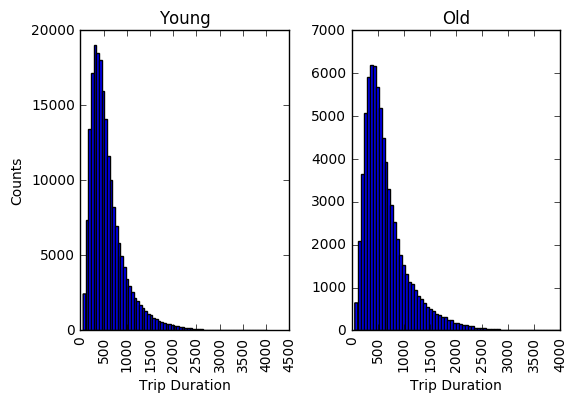

In [11]:
h = df_small.hist(column = 'tripduration',by = 'old', bins = 69)
h[0].set_xlabel('Trip Duration')
h[1].set_xlabel('Trip Duration')
h[0].set_ylabel('Counts')
h[1].set_ylabel('')
h[0].set_title("Young")
h[1].set_title("Old")

### Figure 1: The histograms of younger and older riders provides some evidence that older rides may take longer duration trips

In [12]:
# T test

(df_small.groupby('old').mean().tripduration[1] - df_small.groupby('old').mean().tripduration[0]) / \
np.sqrt(df_small.groupby('old').std().tripduration[1]**2/df_small.groupby('old').count().tripduration[1] + \
        df_small.groupby('old').std().tripduration[0]**2/df_small.groupby('old').count().tripduration[0])

35.344390340295988

# Robustness Check

In [13]:
datestring = '201506'
getCitiBikeCSV(datestring)

('Downloading', '201506')
file in place, you can continue


In [14]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:00:00
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:00:00
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:01:00
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:01:00
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:02:00


In [15]:
df_small = df[['tripduration','birth year']]

In [16]:
df_small.head()

,tripduration,birth year
0,1338,1984.0
1,290,1997.0
2,634,1993.0
3,159,1981.0
4,1233,NaN


In [17]:
df_small = df_small.dropna()
df_small.head()

,tripduration,birth year
0,1338,1984.0
1,290,1997.0
2,634,1993.0
3,159,1981.0
5,690,1976.0


In [18]:
df_small['age'] = 2015 - df_small['birth year']

In [19]:
df_small.describe()

,tripduration,birth year,age
count,810827.000000,810827.000000,810827.000000
mean,775.491180,1976.256380,38.743620
std,2668.200167,11.465324,11.465324
min,60.000000,1885.000000,16.000000
25%,378.000000,1968.000000,30.000000
50%,593.000000,1979.000000,36.000000
75%,942.000000,1985.000000,47.000000
max,707490.000000,1999.000000,130.000000


We will define old riders as those who are 48 and older.

In [20]:
df_small['old'] = 1 * df_small.age >=48

In [21]:
#remove outlier ages
sd_threshold = 4
df_small = df_small[abs(df_small.age - df_small.age.mean()) < (sd_threshold * df_small.age.std())]
df_small.describe()

#remove outlier trip durations
df_small = df_small[abs(df_small.tripduration - df_small.tripduration.mean()) < (sd_threshold * df_small.tripduration.std())]
df_small.describe()

,tripduration,birth year,age
count,809947.000000,809947.000000,809947.000000
mean,737.668084,1976.282569,38.717431
std,547.631948,11.377954,11.377954
min,60.000000,1931.000000,16.000000
25%,378.000000,1968.000000,30.000000
50%,593.000000,1979.000000,36.000000
75%,940.000000,1985.000000,47.000000
max,11415.000000,1999.000000,84.000000


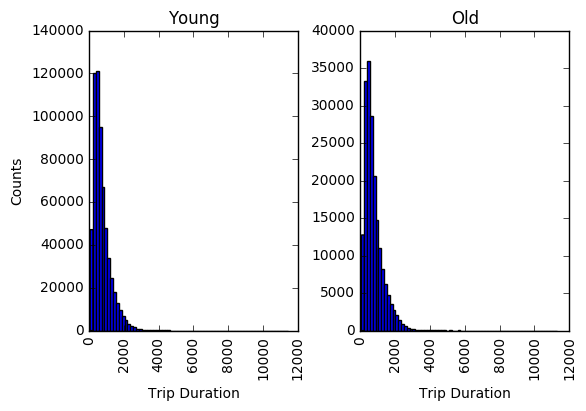

In [22]:
h = df_small.hist(column = 'tripduration',by = 'old', bins = 69)
h[0].set_xlabel('Trip Duration')
h[1].set_xlabel('Trip Duration')
h[0].set_ylabel('Counts')
h[1].set_ylabel('')
h[0].set_title("Young")
h[1].set_title("Old")

### Figure 1: The histograms of younger and older riders provides some evidence that older rides may take longer duration trips

In [23]:
# T test

(df_small.groupby('old').mean().tripduration[1] - df_small.groupby('old').mean().tripduration[0]) / \
np.sqrt(df_small.groupby('old').std().tripduration[1]**2/df_small.groupby('old').count().tripduration[1] + \
        df_small.groupby('old').std().tripduration[0]**2/df_small.groupby('old').count().tripduration[0])

27.224856212591149